<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/%20learning/operanalyst/fuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy logické systémy

> **Doporučené video**
> 
> [Machine Intelligence - Lecture 17 (Fuzzy Logic, Fuzzy Inference) 1h 22min](https://www.youtube.com/watch?v=TReelsVxWxg)

## Booleova algebra

Booleova algebra předpokládá, že každý výrok je buď pravdivý nebo nepravdivý.
Číslo X je buď rovno 0 nebo není. Žádné "mezihodnoty" neexistují.

Možné logické proměnné jsou tedy `True` a `False`

Pravdivostní tabulka pro operátor AND

| X | Y | (X and Y)|
|:-:|:-:|:----:|
| 0 | 0 |   0  |
| 0 | 1 |   0  |
| 1 | 0 |   0  |
| 1 | 1 |   1  |

Pravdivostní tabulka pro operátor OR

| X | Y | (X or Y)|
|:-:|:-:|:----:|
| 0 | 0 |   0  |
| 0 | 1 |   1  |
| 1 | 0 |   1  |
| 1 | 1 |   1  |


In [2]:
def createBoolTest(trueValue, falseValue):
    def test(func):
        print(func)
        print('True\tTrue\t', func(trueValue)(trueValue) == trueValue)
        print('False\tTrue\t', func(falseValue)(trueValue) == trueValue)
        print('True\tFalse\t', func(trueValue)(falseValue) == trueValue)
        print('False\tFalse\t', func(falseValue)(falseValue) == trueValue)
    return test

In [3]:
boolTest = createBoolTest(True, False)
def And(a):
    def AndAnd(b):
        return a & b
    return AndAnd

def Or(a):
    def OrOr(b):
        return a | b
    return OrOr

boolTest(Or)
print('-'*10)
boolTest(And)

<function Or at 0x7f7660b41ef0>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function And at 0x7f7660b41b00>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


## Fuzzy algebra

Fuzzy algebra předpokládá, že každá hodnota na intervalu $<0;1>$ je možnou / přípustnou hodnotou.

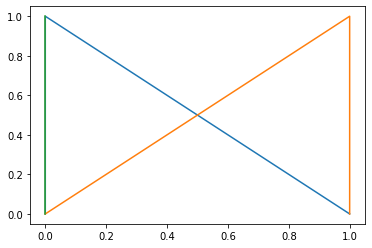

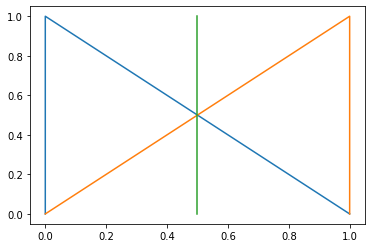

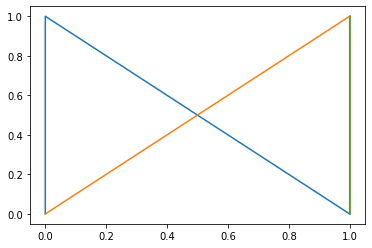

In [4]:
import matplotlib.pyplot as plt

def plotFuzzyVariable(value):
    plt.plot([0, 0, 1, 1], [0, 1, 0, 0])
    plt.plot([0, 0, 1, 1], [0, 0, 1, 0])
    plt.plot([value, value], [0, 1])
    plt.show()

plotFuzzyVariable(0)
plotFuzzyVariable(0.5)
plotFuzzyVariable(1)

In [5]:
def fuzzyAnd(a):
    def fuzzyAndAnd(b):
        return min(a, b)
    return fuzzyAndAnd

def fuzzyOr(a):
    def fuzzyOrOr(b):
        return max(a, b)
    return fuzzyOrOr

boolTest = createBoolTest(1, 0)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)


<function fuzzyOr at 0x7f766052fd40>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function fuzzyAnd at 0x7f766052f3b0>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


In [6]:
boolTest = createBoolTest(0.7, 0.3)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)

<function fuzzyOr at 0x7f766052fd40>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function fuzzyAnd at 0x7f766052f3b0>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


In [8]:
boolTest = createBoolTest(0.51, 0.49)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)

<function fuzzyOr at 0x7f766052fd40>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function fuzzyAnd at 0x7f766052f3b0>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


## Universum

[0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.5, 1]


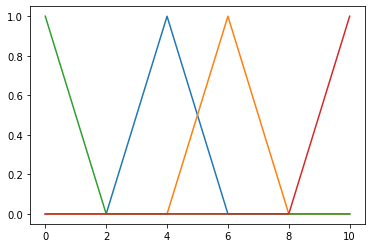

In [38]:
fuzzyUniversum = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
def fuzzyVectorCreator(values=fuzzyUniversum, leftDelta=2, rightDelta=2):
    def resultFunc(value):
        leftValue = max(value - leftDelta, values[0])
        rightValue = min(value + rightDelta, values[-1])
        
        result = []
        for item in values:
            if item < leftValue:
                result.append(0)
            elif item == value:
                result.append(1)
            elif item < value:
                resultItem = (item - leftValue) / leftDelta
                result.append(resultItem)
            elif item <= rightValue:
                resultItem = (rightValue - item) / rightDelta
                result.append(resultItem)
                pass
            else:
                result.append(0)
        return result
    return resultFunc

fuzzyMapper = fuzzyVectorCreator()
fuzzyVectorA = fuzzyMapper(4.0)
fuzzyVectorB = fuzzyMapper(6.0)
fuzzyVectorC = fuzzyMapper(0.0)
fuzzyVectorD = fuzzyMapper(10)

plt.plot(fuzzyUniversum, fuzzyVectorA)
plt.plot(fuzzyUniversum, fuzzyVectorB)
plt.plot(fuzzyUniversum, fuzzyVectorC)
plt.plot(fuzzyUniversum, fuzzyVectorD)
print(fuzzyVectorD)

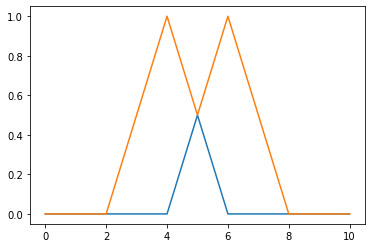

In [40]:
def fuzzyVectorAnd(x, y):
    result = []
    for xItem, yItem in zip(x, y):
        result.append(min(xItem, yItem))
    return result

def fuzzyVectorOr(x, y):
    result = []
    for xItem, yItem in zip(x, y):
        result.append(max(xItem, yItem))
    return result  

fuzzyVectorA = fuzzyMapper(4.0)
fuzzyVectorB = fuzzyMapper(6.0)
andVector = fuzzyVectorAnd(fuzzyVectorA, fuzzyVectorB)
orVector = fuzzyVectorOr(fuzzyVectorA, fuzzyVectorB)

#plt.plot(fuzzyVectorA)
#plt.plot(fuzzyVectorB)
plt.plot(andVector)
plt.plot(orVector)

## Názvosloví

Antecedent

Consequent



## Pravidla

Situace v restauraci, rozhodování o spropitném.
Hodnotíme jídlo a obsluhu. Pro hodnocení jídla volíme stupnici:
- špatné
- dobré
- vynikající

Pro hodnocení obsluhy volíme stupnici:
- špatná
- dobrá
- skvělá

Pro spropitné si stanovujeme tato pravidla:
- **jestliže** jídlo bylo vynikající **nebo** obsluha byla skvělá je spropitné **vysoké**
- **jestliže** obsluha byla dobrá je spropitné **střední**
- **jestliže** jídlo bylo špatné **a** obsluha byla špatná je spropitné **nízké**